Обсудим градиентный бустинг для произвольной и дифференцируемой функции потерь  
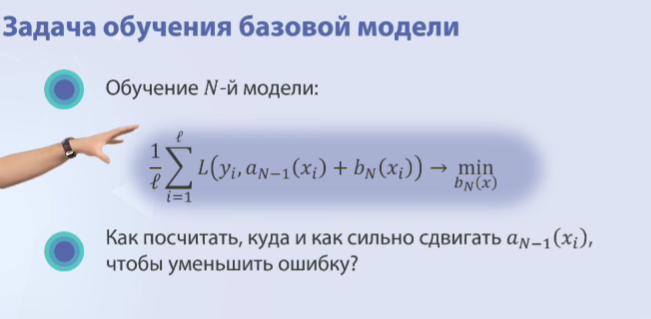  
В такой постановке задачи непонятно, как обучать дерево на такой функционал; нельзя обучать n-ую модель на отклонение уже построенной композиции(прошла лекция про это)  
Посмотрим как нужно сдвигать уже построенную композицию для уменьшения оишбки  
Возьмем производную!  
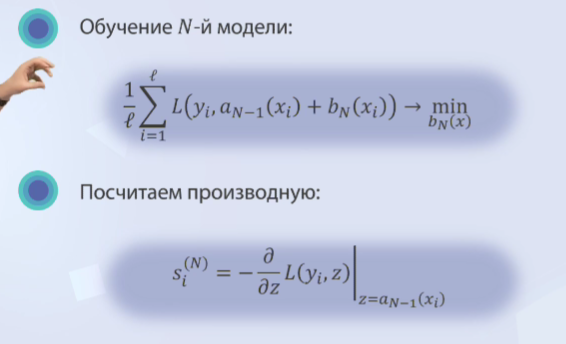  
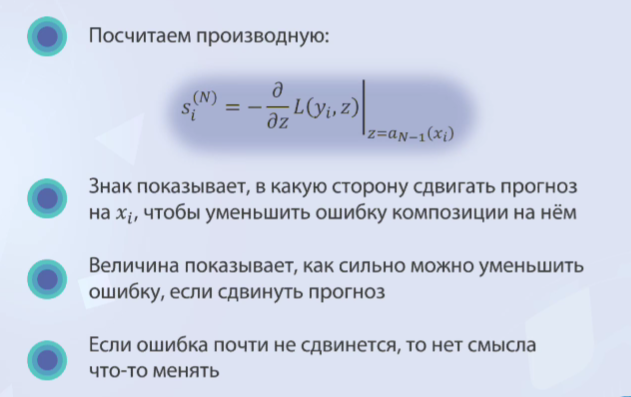  
То есть если производная по модулю большая, то при движении в ту сторону, то ошибка будет сильно уменьшаться  
Если производная крутится возле нуля, то изменения в ту сторону не сильно повлияют на ошибку  
Если антипроизводная отрицательная, то нужно уменьшать прогноз, если положительная, то увеличивать сам прогноз  
  
Рассмотрим обучение  
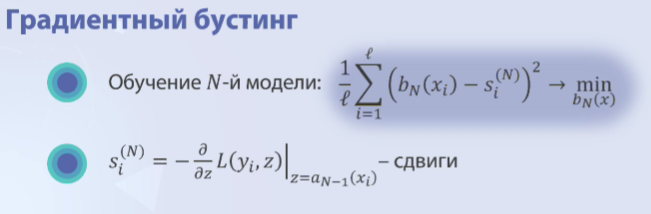  
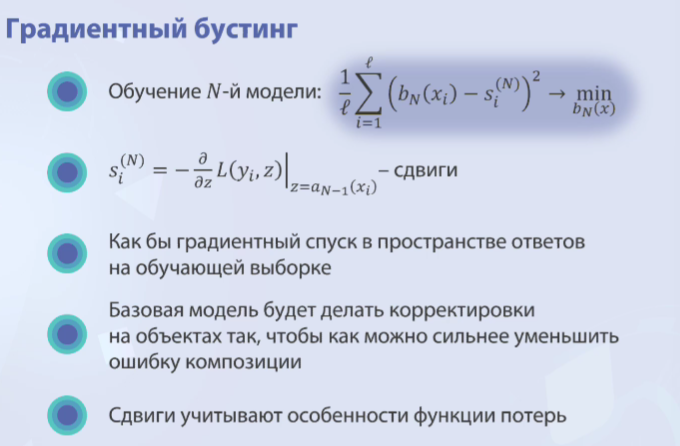  
Рассмотрим для конкретных функций потерь  
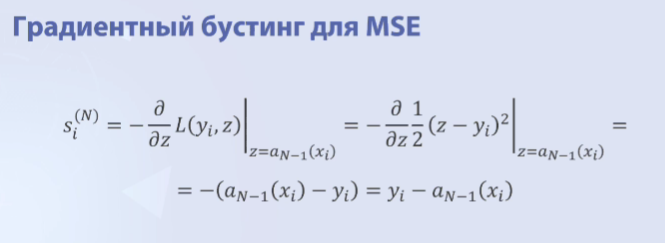  
для удобства добавили $\frac{1}{2}$  
По сути общая схема градиентного бустинга для MSE совпала с идеей подмены остатка из прошлых лекций, но теперь рассмотрим для логистической функции потерь:  
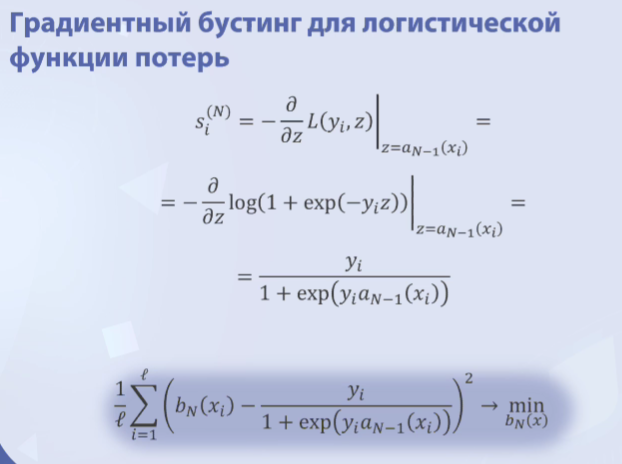  
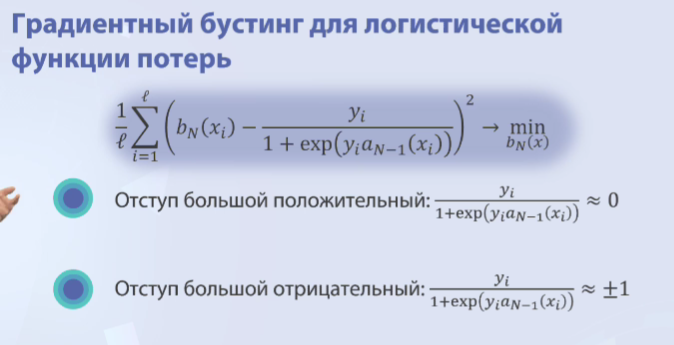  
Отступ большой отрицательный - мы уверенны в нашем ответе и не надо ничего корретировать  
Отступ большой положительный $\rightarrow$ $y_i a_{N-1} x_i$ большое положительное число $\rightarrow$ в знаменателе большое положительное число, а в знаменателе правильный ответ $ y = \pm 1$, то есть при делении на большое число будем близки к нулю  

Отступ большой отрицательный $\rightarrow$ в знаменателе 1 + маленькое число и при делении $y = \pm 1$ на число близкое к 1 будем получать просто исходный $y$, то есть $\pm 1$  

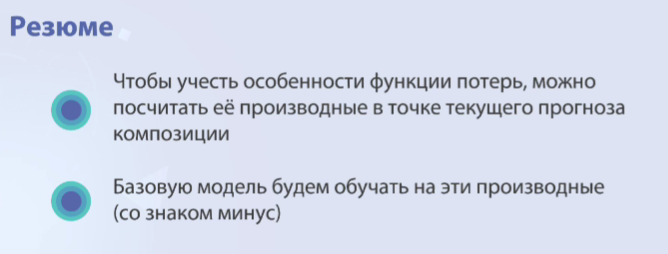  
То есть основная идея градиентного бустинга в том, что N-ая модель строится основываясь на антипроизводных N-1 модели, аппроксимируя их, двигая новую модель в сторону уменьшения ошибки  


### Полный процесс обучения модели в градиентном бустинге:

1. **Инициализация (начальная модель)**:
   - Начинаем с **базовой модели** \( F_0(x) \), которая может быть любой простой моделью, например, константой — в случае регрессии это обычно среднее значение целевой переменной на обучающей выборке.
   
2. **Вычисление функции потерь**:
   - На следующем шаге мы оцениваем, насколько точны предсказания \( F_0(x) \), с помощью функции потерь. Допустим, это **среднеквадратичная ошибка (MSE)**. Функция потерь показывает, насколько велика ошибка между предсказаниями и реальными значениями целевой переменной.

3. **Вычисление антиградиентов**:
   - Теперь наша цель — уменьшить функцию потерь. Для этого мы вычисляем **градиенты** функции потерь по предсказаниям \( F_0(x) \). Градиент указывает, в каком направлении и насколько нужно изменить прогнозы модели, чтобы минимизировать ошибку.
   - Мы берем **антиградиент** (градиент со знаком минус), так как он показывает направление, в котором нужно двигаться для **уменьшения ошибки**.

   Формально:
   \[
   \text{градиент} = \frac{\partial L(y, F(x))}{\partial F(x)}
   \]
   Где \( L(y, F(x)) \) — функция потерь (например, MSE), \( y \) — истинные значения целевой переменной, \( F(x) \) — предсказания модели.

4. **Построение нового дерева на антиградиентах**:
   - Теперь мы обучаем **новое дерево решений** (или другую модель), используя **антиградиенты** как целевую переменную. То есть это дерево будет пытаться предсказывать сдвиги (разности между реальными значениями и текущими предсказаниями модели).
   - По сути, новое дерево обучается на то, чтобы корректировать ошибки текущей композиции моделей, улучшая предсказания.

   Математически:
   \[
   h_t(x) \approx -\frac{\partial L(y, F_{t-1}(x))}{\partial F_{t-1}(x)}
   \]
   Здесь \( h_t(x) \) — предсказания нового дерева на шаге \( t \), которые аппроксимируют антиградиенты функции потерь.

5. **Обновление композиции модели**:
   - После того как новое дерево \( h_t(x) построено, его предсказания добавляются к предсказаниям текущей композиции с использованием **коэффициента обучения** \( \eta \). Это позволяет обновить предсказания модели и сделать их более точными.

   Правило обновления модели:
   \[
   F_t(x) = F_{t-1}(x) + \eta \cdot h_t(x)
   \]
   Где:
   - \( F_t(x) \) — новая композиция моделей на шаге \( t \).
   - \( F_{t-1}(x) \) — предыдущая композиция моделей.
   - \( h_t(x) \) — предсказания нового дерева (аппроксимированные антиградиенты).
   - \( \eta \) — коэффициент обучения (обычно небольшое значение, например, 0.1 или 0.01).

6. **Повторение процесса**:
   - Этот процесс повторяется: на каждом следующем шаге мы снова:
     - Вычисляем новые антиградиенты для обновленной модели.
     - Строим новое дерево для этих антиградиентов.
     - Добавляем его предсказания к текущей композиции с учётом коэффициента обучения.
   - Процесс продолжается до тех пор, пока модель не станет достаточно хорошей, или пока не будет достигнуто заранее заданное количество деревьев (итераций).

7. **Окончательная модель**:
   - Итоговая модель — это **композиция всех базовых моделей (деревьев)**, построенных на каждом шаге:
   \[
   F_T(x) = F_0(x) + \eta \cdot \sum_{t=1}^{T} h_t(x)
   \]
   Где \( T \) — общее количество шагов (построенных деревьев).

### Дополнительные детали:

- **Коэффициент обучения (\(\eta\))**:
  - Он контролирует, насколько сильно новое дерево влияет на финальные предсказания. Небольшое значение \(\eta\) предотвращает резкие изменения модели и уменьшает риск переобучения.
  
- **Маленькие деревья**:
  - В градиентном бустинге деревья решений обычно имеют небольшую глубину (например, 3-5 уровней). Эти деревья называют **слабыми моделями**, так как каждое из них по отдельности может делать только грубые предсказания, но в совокупности они создают сильную модель.
  
- **Функция потерь**:
  - Мы рассмотрели случай регрессии с MSE, но можно использовать и другие функции потерь, например, логистическую функцию для классификации. В таком случае градиенты будут рассчитываться для соответствующей функции потерь.

### Важные моменты:

- **Антиградиенты показывают, как нужно скорректировать предсказания** текущей модели на каждом объекте, чтобы минимизировать ошибку.
- **Новое дерево** обучается на этих антиградиентах и пытается их аппроксимировать.
- **Коэффициент обучения** смягчает корректировку, делая её постепенной, что помогает избежать переобучения.

### Пример:

Допустим, мы решаем задачу регрессии. У нас есть текущая модель \( F_{t-1}(x) \), которая делает предсказания, но эти предсказания ещё не точные. Мы вычисляем градиенты (антиградиенты) для каждого объекта, которые говорят нам, насколько текущие предсказания отличаются от истинных значений и что нужно исправить.

Затем мы строим новое дерево \( h_t(x) \), которое обучается на этих антиградиентах. Дерево будет стараться сделать такие предсказания, чтобы приблизить текущие предсказания модели к истинным значениям.

После этого мы обновляем композицию: добавляем предсказания нового дерева к текущим предсказаниям с учётом коэффициента обучения.

### Итог:

После каждого шага градиентного бустинга модель становится немного лучше. Каждый шаг (новое дерево) исправляет ошибки предыдущих шагов, добавляя корректировки на основе антиградиентов. Так формируется сильная модель — **композиция слабых моделей**, которые вместе дают точные предсказания.
